# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

$$ L(x,y,w) = \frac{1}{l}\sum\limits_{i=1}^l (\sum\limits_{j=1}^n w_{j}*x_{ij} - y_{i})^2  
+ \frac{1}{C}\sum\limits_{i=1}^n w_i^2 
$$\\ 
w_{new} = w_{old} - \alpha \frac{1}{l} \sum\limits_{k=1}^l \nabla_{w_{old}}L(x_{k},y_{k},w_{old}) 
\\
\frac{dL(x_{k},y_{k},w_{old})}{dw_{i}} = \frac{d [ (\sum\limits_{j=1}^n w_{j}*x_{kj} - y_{k})^2  
+ \frac{1}{C}\sum\limits_{j=1}^n w_j^2 ]}{dw_{i}} = (2\sum\limits_{j=1}^n w_{j}*x_{kj} - y_{k})x_{ki} 
+ \frac{2w_{i}}{C} 
\ (здесь \ x_{kj} - j \ элемент \ вектора \ x_{k})
\\
w_{new} = w_{old} -  \frac{2\alpha}{l} \sum\limits_{k=1}^l [(w_{old}, x_{k}) - y_{k}]x_{k} 
- \frac{2\alpha w_{old}}{C} $$

***Ваше решение здесь***

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

$$L(x,y,w) = - \frac{1}{l}\left[\sum_{k=1}^l y_k \log \sigma(x_{k},w) + (1 - y_k) \log (1 - \sigma(x_{k},w)) \right] +  \frac{1}{C}\sum\limits_{i=1}^{n} w_{i}^2
\\ 
w_{new} = w_{old} - \alpha \frac{1}{l} \sum\limits_{k=1}^l \nabla_{w_{old}}L(x_{k},y_{k},w_{old}) 
\\
\frac{dL(x_{k},y_{k},w_{old})}{dw_{i}} = \frac{d( -\frac{1}{l} \sum\limits_{k=1}^l y_k \left[\log \sigma(x_{k},w) + (1 - y_k) \log (1 - \sigma(x_{k},w)) \right] +  \frac{1}{C}\sum\limits_{i=1}^{n} w_{i}^2)}{dw_{i}} =
\\
=\frac{1}{l} \left[ \sum\limits_{k=1}^l y_{k}\frac{\sigma(x_{k},w)^2}{\sigma(x_{k},w)}e^{-(x_{k},w)}x_{ik} - (1 - y_{k})\frac{\sigma(x_{k},w)^2}{1 - \sigma(x_{k},w)}e^{-(x_{k},w)}x_{ik} \right] + \frac{2w_{i}}{C}= 
\\
=\frac{1}{l} \left[ \sum\limits_{k=1}^l (\sigma(x_{k},w) - y_{k})x_{ik} \right] + \frac{2w_{i}}{C}
\\
w_{new} = w_{old} - \frac{\alpha}{l} \left[ \sum\limits_{k=1}^l (\sigma(x_{k},w) - y_{k}) x_{k} \right]  - \frac{2 \alpha w_{old}}{C}$$

Интуитивно градиент -> некоторое среднее по батчу значение разницы между предсказанными значениями и реальными значениями

***Ваше решение здесь***

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

#### 3.1$$
Q(w) = \frac{1}{n}||Xw- Y||^2 = \frac{1}{n} (Xw - Y)^{T}(Xw - Y) = \frac{1}{n}(w^{T}X^{T}Xw-y^{T}Xw-w^{T}X^{T}y +y^{T}y)  => \\ 
\frac{dQ}{dw} = 2X^{T}Xw-2X^{T}y = 0 - точка \ экстремума, \ тогда \ w = (X^{T}X)^{-1}X^{T}y => \\
\frac{d^2Q}{dw^2} = 2X^{T}X; \ \forall w: \ (2X^{T}Xw, w) = 2(Xw, Xw) > 0 \ ч. \ т. \ д.$$

#### 3.2$$
Q(w) = \frac{1}{n}||Xw- Y||^2 + \alpha ww^{T} \\
\frac{dQ}{dw} = 2X^{T}Xw-2X^{T}y + 2 \alpha w E = 0 - точка \ экстремума, \ тогда \ w = (X^{T}X + \alpha E)^{-1}X^{T}y$$

Если матрица содержит линейно зависимые признаки то некоторые значения матрицы X^T * X будут близки к 0, значит обратить её либо не удастся, либо это получится сделать, но в этом случае получим очень большие значения в обратной. Регуляризация помогает справится с этой проблемой, изменяя значения матрицы.

***Ваше решение здесь***

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

1) рассмотрим $\frac{d(E(L|x_i)}{da} = -\frac{p(y_i = 1|x_i)}{a(x_i)} + \frac{p(y_i = 0|x_i)}{1 - a(x_i)} = \frac{-p(y_i = 1|x_i) + p(y_i = 1|x_i)a(x_i) + p(y_i = 0|x_i)a(x_i)}{a(x_i)(1 - a(x_i))} = \frac{a(x_i) - p(y_i = 1|x_i)}{a(x_i)(1 - a(x_i))}$

2) ясно что вероятность 0 <= $p(y_i = 1|x_i)$ <= 1 в любом случае - до 1 функция растёт, после 1 функция убывает до  $p(y_i = 1|x_i)$, и, затем функция растет до 0 ( следует из знака производной ). Следовательно эта точка - точка в которой достигается минимум.

***Ваше решение здесь***

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

В регуляризации не нужно использовать свободный член $w_0$ , ведь он отвечает за сдвиг в гиперпрсотранстве

***Ваше решение здесь***

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [35]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """

    if shuffle:
        index = np.random.permutation(y.shape[0])
    for i in range(y.shape[0] // batch_size):
        X_batch = X[index[i*batch_size:(i+1)*batch_size]]
        y_batch = y[index[i*batch_size:(i+1)*batch_size]]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [51]:
# %%pycodestyle
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1,
                 alpha=0.01, max_epoch=10,
                 model_type='lin_reg',
                 batch_size=1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}
        self.model_type = model_type
        self.batch_size = batch_size

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        n = y_batch.shape[0]
        w = np.copy(self.weights)
        w[0] = 0
        if self.model_type != "log_loss":
            loss = (np.dot(X_batch, self.weights) - y_batch) ** 2 / n
        else:
            p = sigmoid(np.dot(X_batch, self.weights))  # сигмоида
            loss = -(1 / n) * ((y_batch * np.log(p))
                               + (1 - y_batch) * np.log(1 - p))
        return loss + (1 / self.C) * np.sum(w ** 2)

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу
        (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        n = y_batch.shape[0]
        w = np.copy(self.weights)
        w[0] = 0
        if (self.model_type == 'lin_reg'):
            loss_grad = (2 / n) * np.dot((
                np.dot(X_batch, self.weights) - y_batch), X_batch)
        else:
            sigm = sigmoid(np.dot(X_batch, self.weights))
            loss_grad = (1 / n) * np.dot((sigm - y_batch), X_batch)
        return loss_grad + 2 / self.C * w

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha*new_grad

    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        X = np.hstack([np.ones((X.shape[0], 1)), X])  # добавляем w_0 = 1
        self.weights = np.random.random(X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(
                X, y, batch_size=self.batch_size)  # случайный батч
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]  # выборка
                y_batch = new_batch[1]  # ответы на выобрке
                batch_loss = self.calc_loss(X_batch, y_batch)
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку
                # для отладки модели
                # До градиентного шага или после
                # batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        return self

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        if self.model_type == "log_loss":
            y_hat = sigmoid(np.dot(X, self.weights))
        else:
            y_hat = np.dot(X, self.weights)
        # Желательно здесь использовать матричные операции
        # между X и весами, например, numpy.dot
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [52]:
# %%pycodestyle


def plot_decision_boundary(clf):
    X = np.linspace(-2, 2)
    y = -( clf.weights[1] * X) / clf.weights[2]
    plt.plot(X, y)

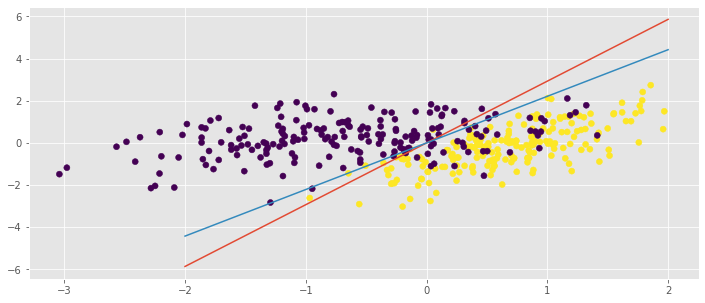

In [53]:
# %%pycodestyle
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])

mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std

y = np.r_[np.ones(200), np.zeros(200)]
my_clf = MySGDClassifier(batch_generator,  alpha=0.01, C=1,
                         max_epoch=10, batch_size=10, model_type='log_loss')
my_clf.fit(X, y)
my_clf1 = MySGDClassifier(batch_generator, alpha=0.01, C=1,
                          max_epoch=10, batch_size=10, model_type='lin_reg')
my_clf1.fit(X, y)
plot_decision_boundary(my_clf)
plot_decision_boundary(my_clf1)

plt.scatter(X[:, 0], X[:, 1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [41]:
from sklearn.datasets import make_classification

In [54]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

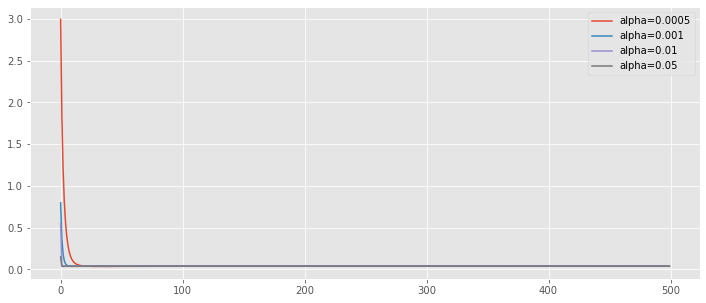

In [55]:
# %%pycodestyle
N = 100
alpha = [0.0005, 0.001, 0.01, 0.05]
for i in alpha:
    clf = MySGDClassifier(batch_generator, max_epoch=50,
                          model_type='lin_reg', batch_size=100, alpha=i)
    clf.fit(X, y)
    loss = np.array([np.mean(clf.errors_log['loss'][i * N: (i + 1) * N])
                     for i in range(len(clf.errors_log['loss']) // N)])
    plt.plot(loss, label='alpha={}'.format(i))
plt.legend()

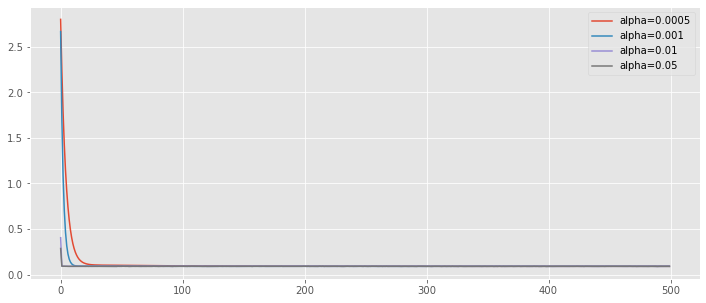

In [17]:
# %%pycodestyle
N = 100
alpha = [0.0005, 0.001, 0.01, 0.05]
for i in alpha:
    clf = MySGDClassifier(batch_generator, max_epoch=50,
                          model_type='log_loss', batch_size=100, alpha=i)
    clf.fit(X, y)
    loss = np.array([np.mean(clf.errors_log['loss'][i * N: (i + 1) * N])
                     for i in range(len(clf.errors_log['loss']) // N)])
    plt.plot(loss, label='alpha={}'.format(i))
plt.legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

1000.0
215.44346900318845
46.4158883361278
10.0
2.1544346900318843
0.4641588833612782
0.1
0.021544346900318867
0.004641588833612782


<ipython-input-53-926f738f590a>:51: RuntimeWarning: overflow encountered in double_scalars
  return loss + (1 / self.C) * np.sum(w ** 2)
<ipython-input-53-926f738f590a>:46: RuntimeWarning: overflow encountered in square
  loss = (np.dot(X_batch, self.weights) - y_batch) ** 2 / n
<ipython-input-53-926f738f590a>:51: RuntimeWarning: overflow encountered in square
  return loss + (1 / self.C) * np.sum(w ** 2)
<ipython-input-53-926f738f590a>:70: RuntimeWarning: overflow encountered in multiply
  return loss_grad + 2 / self.C * w


0.001


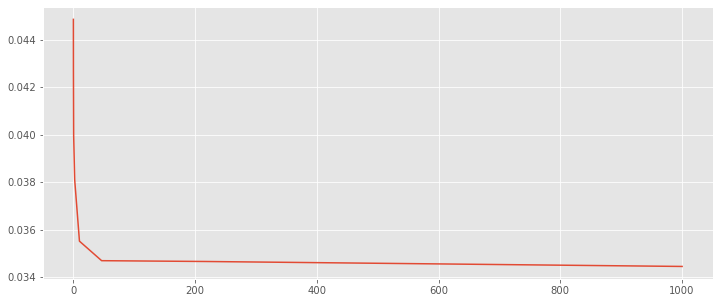

In [56]:
# %%pycodestyle
weights = []
C = np.logspace(3, -3, 10)
for i in C:
    print(i)
    clf = MySGDClassifier(batch_generator, model_type="lin_reg", max_epoch=10, batch_size=100,
                          alpha=0.01, C=i)
    clf.fit(X, y)
    weights.append(np.mean(clf.weights))
plt.plot(C, weights)

1000.0
215.44346900318845
46.4158883361278
10.0
2.1544346900318843
0.4641588833612782
0.1
0.021544346900318867
0.004641588833612782
0.001


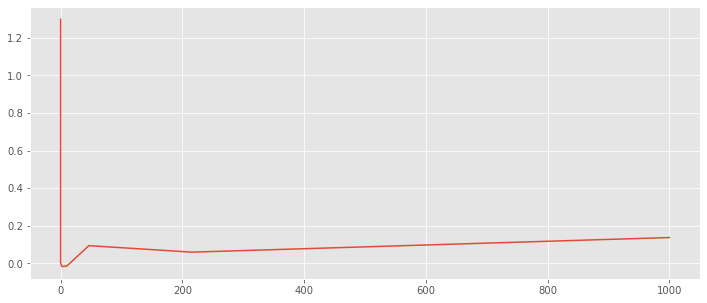

In [57]:
# %%pycodestyle
weights = []
C = np.logspace(3, -3, 10)
for i in C:
    print(i)
    clf = MySGDClassifier(batch_generator, model_type="log_reg", max_epoch=10, batch_size=100,
                          alpha=0.001, C=i)
    clf.fit(X, y)
    weights.append(np.mean(clf.weights))
plt.plot(C, weights)

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [37]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))

28026


In [38]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [39]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print(X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [40]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score

In [41]:
# %%pycodestyle
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
kf = KFold(n_splits=5)

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [27]:
# %%pycodestyle
score = 0
resultC = 0
resultAlpha = 0
resultEpoch = 0
resultModel = ""
C = [1, 10, 100]
alphas = [0.001, 0.005, 0.01]
max_epoch = [5, 10, 50]
model_types = ["lin_reg", "log_loss"]
for const in C:
    for alpha in alphas:
        for epoch in max_epoch:
            for model in model_types:
                tempScore = 0
                for train_split, test_split in kf.split(X_train):
                        X_tr = X_train[train_split]
                        y_tr = y_train[train_split]
                        X_tst = X_train[test_split]
                        y_tst = y_train[test_split]
                        clf = MySGDClassifier(batch_generator,
                                              model_type=model,
                                              max_epoch=epoch,
                                              alpha=alpha,
                                              C=const,
                                              batch_size=100)
                        clf.fit(X_tr, y_tr)
                        my_clf_pred = clf.predict(X_tst)
                        tempScore += roc_auc_score(y_tst, my_clf_pred)
                print(tempScore / 5)
                if(tempScore > score):
                    score = tempScore / 5
                    resultC = const
                    resultAlpha = alpha
                    resultEpoch = epoch
                    resultModel = model
print("Score: ", score)
print("C: ", resultC)
print("Alpha: ", resultAlpha)
print("Epoch: ", resultEpoch)
print("Model_type: ", resultModel)

0.7681338096662087


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))


0.7988702777715748
0.7961379563240536


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))


0.7987029227016325
0.7996285446326342


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))


0.799327819347038
0.799589360209714
0.7992737299022374
0.7995397249774406


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))


0.799329701545447
0.7996215397592854


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))


0.7993493092719934
0.7995692692825519


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))


0.7993329384355595
0.7996274253471485


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))


0.7993284878938478
0.7995317250081607


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))


0.79934332899229
0.7271436274128543


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))


0.7986743473271838
0.7290725455684888


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))


0.7990765286478749
0.7932738622858071


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))


0.7978761675390296
0.7644719820247979


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))


0.7965604310312641
0.7933755744958668


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))


0.7989709735093042
0.7994579389160521


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))


0.7997169657454497
0.7928023268793085


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))


0.7994649109429879
0.7990240893542885


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))


0.7997507031481048
0.7995331100253245


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))


0.7996904297452194
0.6987860144234764


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))


0.7994488828793798
0.7247275987488989


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))


0.7975964672304376
0.7713013750126236


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))


0.7915377536576753
0.7557211865904112


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))


0.7952405513493348
0.7654593557963633


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))


0.7945783997978566
0.7954662607843574


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))


0.7983839735598248
0.7592775592244596


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))


0.792846969071153
0.7831774583868955


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))


0.7912233824646855
0.797969545709601


<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-7-e44912e58696>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))


0.7998089988409629
Score:  0.7998089988409629
C:  100
Alpha:  0.01
Epoch:  50
Model_type:  log_loss


Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [28]:
kf = KFold(n_splits=3)

In [40]:
# %%pycodestyle
score = np.arange(300, dtype=float).reshape(3, -1)
# кросс фалидация на 3 фолдах,
# для каждого 100 значений скора
a = 0
for train_split, test_split in kf.split(X_train):
    X_tr = X_train[train_split]
    y_tr = y_train[train_split]
    X_t = X_train[test_split]
    y_t = y_train[test_split]
    clf = MySGDClassifier(batch_generator, model_type="log_loss", max_epoch=50,
                          alpha=0.01, C=100, batch_size=100)
    clf.fit(X_tr, y_tr)
    my_clf_pred = clf.predict(X_t)
    for i in range(100):
        score[a][i] = f1_score(my_clf_pred > i * 0.01, y_t)
    a += 1
score = score.mean(axis=0)
print("score", score.max())
print(np.where(score == score.max()))

<ipython-input-38-4ef56f4e1606>:50: RuntimeWarning: divide by zero encountered in log
  + (1 - y_batch) * np.log(1 - p))
<ipython-input-38-4ef56f4e1606>:50: RuntimeWarning: invalid value encountered in multiply
  + (1 - y_batch) * np.log(1 - p))


score 0.6181027057672899
(array([32]),)


In [42]:
# %%pycodestyle
test_data = pd.read_csv('test_groups.csv')
test_groups_titledata = {}
for i in range(len(test_data)):
    new_doc_test = test_data.iloc[i]
    doc_group_test = new_doc_test['group_id']
    doc_id_test = new_doc_test['doc_id']
    title_test = doc_to_title[doc_id_test]
    if doc_group_test not in test_groups_titledata:
        test_groups_titledata[doc_group_test] = []
    test_groups_titledata[doc_group_test].append((doc_id_test, title_test))
X_test = []
groups_test = []
for new_group in test_groups_titledata:
    docs_test = test_groups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs_test):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs_test)):
            if k == j:
                continue
            doc_id_j, title_j = docs_test[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print(X_test.shape, groups_test.shape)

(16627, 15) (16627,)


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [55]:
# %%pycodestyle
scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)
clf = MySGDClassifier(batch_generator, model_type="log_loss", max_epoch=50,
                      alpha=0.01, C=100, batch_size=100)
clf.fit(X_train, y_train)
my_clf_pred = clf.predict(X_test)
test_data["target"] = pd.Series(np.array((my_clf_pred > 0.32), dtype=int))
with open("attemp4.csv", "w") as f:
    f.write(test_data.to_csv(columns=("pair_id", "target"), index=False))

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***

Все здорово, спасибо за интересный и полезный материал.